## Принятие решений в бизнесе на основе данных

### Описание проекта

Отдел аналитики крупного интернет-магазин вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

В первой части проекта в нашем распоряжении файл с 9 гипотезами по увеличению выручки с необходимыми параметрами для приоритизации гипотез -  Reach, Impact, Confidence, Effort.

Во второй части проекта нам даны 2 файла с результатами A/B теста:

/datasets/orders.csv - содержит информацию о заказах по двум тестируемым группам:
transactionId - идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.

И /datasets/visitors.csv , в котором содержатся данные о визитах:
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### План

#### Часть 1. Приоритизация гипотез.
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.
#### Часть 2. Анализ A/B-теста

Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Анализ и выводы.
2. Построить график кумулятивного среднего чека по группам.Анализ и выводы.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Анализ и выводы.
4. Построить график кумулятивной конверсии по группам. Анализ и выводы.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Анализ и выводы.
6. Построить точечный график количества заказов по пользователям. Анализ и выводы.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Анализ и выводы.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Анализ и выводы.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Анализ и выводы.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Анализ и выводы.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.Анализ и выводы.
14. Принять решение по результатам теста 

### Часть 1. Приоритизация гипотез.

In [1]:
#read file
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pylab as pl
from scipy import stats as st
import math as mth
import scipy.stats as stats

hypothesis_data = pd.read_csv('/datasets/hypothesis.csv')
hypothesis_data.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [2]:
#change columns name to lowercase
hypothesis_data.columns  = map(str.lower, hypothesis_data.columns)
hypothesis_data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#show full hypothesis
for hypothesis in hypothesis_data.hypothesis:
     print(hypothesis)

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Запустить собственную службу доставки, что сократит срок доставки заказов
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Запустить акцию, дающую скидку на товар в день рождения


#### Применим фреймворк ICE для приоритизации гипотез.

In [4]:
#count priority of hypothesis using framework ICE and sort it
hypothesis_data['ice'] = hypothesis_data.impact * hypothesis_data.confidence/hypothesis_data.efforts
hypothesis_data = hypothesis_data.sort_values(by = 'ice', ascending = False)
hypothesis_data.head()

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000


С помощью фреймворка ICE мы приоритизирвали гипотезы и выяснили, что наиболее перспективной гипотезой является запуск акции, дающий скидку на товар в день рождения.Применение данной гипотезы с максимально большей вероятностью сможет улучшить ключевые метрики, так как соотношение влияния данной гипотезы на пользователей, уверенность в результате и количество приложенных усилий в результате дают более высокую оценку, чем другие гипотезы. Логично предположить,что пользователи у которых день рождения воспользуются данной акцией,так как они получат существенную экономию при покупке необходимого товара, мы же получим прибыль от пользователя, который раньше возможно сомневался в покупке данного товара, однако с учетом скидки решил его преобрести. Так же объем трудозатрат, который будет затрачен на внедрение данной гипотезы средний относительно общей шкалы(при шкале до 10),потребуется анонс акции(платная реклама), затраты на верстку анонса акции на сайте. Однако сравним в следующем пункте гипотезы с помощью фрейворка RICE, с дополнительным параметром reach(обьем охвата)

#### Применим фреймворк RICE для приоритизации гипотез.

In [5]:
#count priority of hypothesis using framework RICE and sort it
hypothesis_data['rice'] = hypothesis_data.reach * hypothesis_data.impact * hypothesis_data.confidence/hypothesis_data.efforts
hypothesis_data = hypothesis_data.sort_values(by = 'rice', ascending = False)
hypothesis_data

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Применив фремйворк RICE мы видим изменение приоритизации гипотез относительно фреймворка ICE. Данные изменения произошли благодаря внедрению дополнительного парамертра reach, что является довольно весомым параметром, так как с помощью него мы можем подсчитать сколько пользователей охватит внедрение той или иной гипотезы. Наша гипотеза о запуске акции, дающий скидку в день рождение, оказалась лишь на 5 позиции, так как охватывает очень небольшую долю пользователей и пользователь может воспользоваться этой акцией только раз в году.Наивысшую оценку получила гипотеза о добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, так как охватывает всех пользователей на сайте, требует относительно средних трудозатрат(добавление формы на основных страницах)и оказывает влияние на улучшение ключевых метрик(с помощью клиентской базы сможем отсылать уникальные предложения для каждого пользователя-ремаркетинг,сообщать об анонсах акций)

### Вывод

Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса,мы приоритизировали сформулированные гипотезы с помощью фреймворков ICE и RICE. Анализ оценки данных после применения фреймворков показал, что для тестирования наилучшим вариантом является гипотеза о добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, так как суммарно имеет наивысшую оценку по параметрам Reach, Impact, Confidence, Efforts.

### Часть 2. Анализ A/B-теста

In [6]:
#read file
orders_data = pd.read_csv('/datasets/orders.csv')
visitors_data = pd.read_csv('/datasets/visitors.csv')

In [7]:
#display data
display(orders_data.head())
display(visitors_data.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### Проверка гипотезы о равенстве долей

Cравним доли клиентов, сделавших заказ по двум группам и выясним можно ли сделать вывод о разнице в конверсии визита в заказ по этим группам.

In [8]:
#count number of orders by group
successes  = orders_data.groupby(['group']).transactionId.count()
successes

group
A    557
B    640
Name: transactionId, dtype: int64

In [9]:
#count number of visitors by group
trials = visitors_data.groupby(['group']).visitors.sum()
trials 

group
A    18736
B    18916
Name: visitors, dtype: int64

In [10]:
#count stat differance between two group

alpha = .05 # критический уровень статистической значимости

# пропорция успехов в первой группе:
p1 = successes.A/trials.A

# пропорция успехов во второй группе:
p2 = successes.B/trials.B

# пропорция успехов в комбинированном датасете:
p_combined = (successes.A + successes.B) / (trials.A + trials.B)

# разница пропорций в датасетах
difference = p1 - p2

In [121]:
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials.A + 1/trials.B))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


В результате мы видим, что между двумя группами есть статистическая разница

#### Проверка данных на нормальность. Критерий Шапиро-Уилка

Проверим нашу гипотезу о том, что выборки взяты из нормально распределённых генеральных совокупностей.

In [11]:
revenueA = orders_data[orders_data['group']=='A'].revenue
revenueB = orders_data[orders_data['group']=='B'].revenue

В revenueA сохранены данные о  количестве выручке по группе A. Проверим методом st.shapiro(x), можно ли считать эту переменную нормально распределённой:

In [12]:
### check normal distribution revenueA
alpha = .05 # критический уровень статистической значимости

results = st.shapiro(revenueA)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


p-value меньше уровня значимости, следовательно мы не можем подтвердить нашу гипотезу о том, что распределение нормально. Возможно в нашей выборке есть аномалии, которые искажают распределение.

В revenueB сохранены данные о  количестве выручке по группе B. Аналогично проверим методом st.shapiro(x), можно ли считать эту переменную нормально распределённой:

In [13]:
### check normal distribution revenueB
alpha = .05 # критический уровень статистической значимости

results = st.shapiro(revenueB)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


p-value меньше уровня значимости, следовательно мы не можем подтвердить нашу гипотезу о том, что распределение нормально. Возможно в нашей выборке есть аномалии, которые искажают распределение.

#### Построим график кумулятивной выручки по группам, чтобы определить по накопленным показателям стабилизировались ли метрики

In [14]:
#group revenue by group and day
revenue_by_day = pd.pivot_table(orders_data, index=['date'],
                    columns=['group'], values='revenue', aggfunc=np.sum)
revenue_by_day.columns = ['revenueA','revenueB']

Построим график выручки по дням:

Text(0, 0.5, 'revenue')

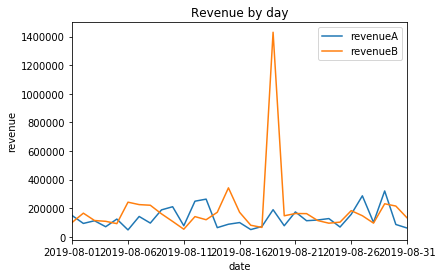

In [15]:
revenue_by_day.plot()
pl.title("Revenue by day")
pl.xlabel("date")
pl.ylabel("revenue")

Мы выявили, что результаты по дням сильно колеблются, поэтому расмотрим данные по выручке на кумулятивном графике:

Text(0, 0.5, 'revenue')

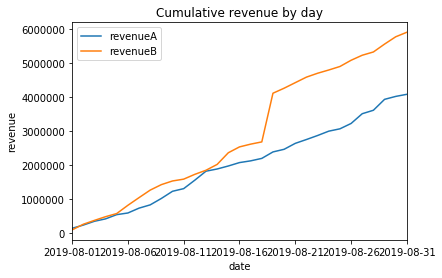

In [16]:
cumulative_revenue = revenue_by_day
#cumulative_revenue.date = pd.to_datetime(cumulative_revenue.date)
cumulative_revenue.revenueA = cumulative_revenue.revenueA.cumsum()
cumulative_revenue.revenueB = cumulative_revenue.revenueB.cumsum()
cumulative_revenue.plot()
pl.title("Cumulative revenue by day")
pl.xlabel("date")
pl.ylabel("revenue")

#ordersAggregated = revenue_by_day.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 'userId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


Мы видим, что группа B показывает выше результат чем А, однако мы видим резкий рост выручки в середине теста, что может быть вызвано заказом с аномально высоким чеком. Далее мы проанализируем выборку на наличие аномалий и сравним результаты по очищенным данным

#### Построим график кумулятивного среднего чека по группам.

In [19]:
#group sum of revenue and number of transaction by group and day
revenue_order_by_day = pd.pivot_table(orders_data, index=['date'],
                    columns=['group'],  aggfunc={'revenue':'sum','transactionId':'count'})

In [20]:
#rename columns
revenue_order_by_day.columns = ['revenueA','revenueB','transactionCountA','transactionCountB']

In [22]:
#count cumulative revenue and number of cumulative transactions
cumulative_revenue_order = revenue_order_by_day
cumulative_revenue_order.revenueA = cumulative_revenue_order.revenueA.cumsum()
cumulative_revenue_order.revenueB = cumulative_revenue_order.revenueB.cumsum()
cumulative_revenue_order.transactionCountA = cumulative_revenue_order.transactionCountA.cumsum()
cumulative_revenue_order.transactionCountB = cumulative_revenue_order.transactionCountB.cumsum()
cumulative_revenue_order = cumulative_revenue_order.reset_index()
cumulative_revenue_order.head()


,date,revenueA,revenueB,transactionCountA,transactionCountB
0,2019-08-01,148579,101217,24,21
1,2019-08-02,242401,266748,44,45
2,2019-08-03,354874,380996,68,61
3,2019-08-04,425699,489567,84,78
4,2019-08-05,549917,581995,109,101


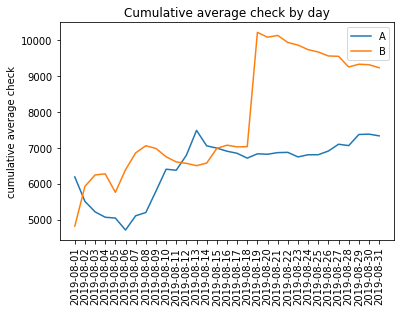

In [23]:
#build cumulative graphics with average check
pl.title("Cumulative average check by day")
pl.ylabel("cumulative average check")
plt.xticks(rotation=90)
plt.plot(cumulative_revenue_order['date'], cumulative_revenue_order['revenueA']/cumulative_revenue_order['transactionCountA'], label='A')
plt.plot(cumulative_revenue_order['date'], cumulative_revenue_order['revenueB']/cumulative_revenue_order['transactionCountB'], label='B')
plt.legend()



На графике кумулятивного среднего чека по группам мы видим, что данные по двум группам колеблются в начале теста, однако в группа A мы видим относительную стабильность метрики ближе к концу теста. В группе B мы видим сильные колебания, причиной могут быть аномально высокий средний чек, который влияет на общую выборку. Далее мы выявим аномальные значения и расмотрим кумулятивный график среднего чека на примере очищенных данных.

Чтобы нагляднее увидеть разницу между группами, построим график относительного различия средних чеков.

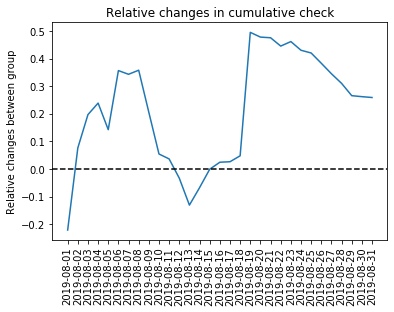

In [24]:
pl.title("Relative changes in cumulative check")
pl.ylabel("Relative changes between group")
plt.xticks(rotation=90)
plt.plot(cumulative_revenue_order['date'], (cumulative_revenue_order['revenueB']/cumulative_revenue_order['transactionCountB'])/(cumulative_revenue_order['revenueA']/cumulative_revenue_order['transactionCountA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Группа B заметно выше группы А по среднему чеку в начале теста, далее мы видим сильный спад метрики группы В,а в середине теста группа В снова превышает показатели группы А. Однако мы видим тренд на снижение метрики B к концу теста. В целом данные по среднему чеку ещё не установились, и сейчас делать какие-либо выводы по тесту нельзя. Так как выше мы предположили, что в наших данных содержатся аномалии, вычислим их и сравним очищенных данные на графике относительного различия. 

#### Построим график кумулятивной конверсии по группам

In [25]:
#count visitors per day by group
visitors_by_day = pd.pivot_table(visitors_data, index=['date'],
                    columns=['group'], values='visitors', aggfunc=np.sum)
visitors_by_day.columns = ['visitorsA','visitorsB']
visitors_by_day

,visitorsA,visitorsB
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707
2019-08-06,667,655
2019-08-07,644,709
2019-08-08,610,654
2019-08-09,617,610


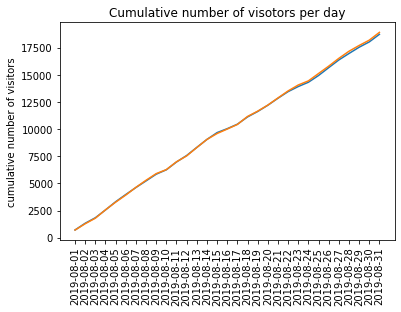

In [26]:
#build graphics by visitort
pl.title("Cumulative number of visotors per day")
pl.ylabel("cumulative number of visitors")
plt.xticks(rotation=90)
cumulative_visitors = visitors_by_day
#cumulative_revenue.date = pd.to_datetime(cumulative_revenue.date)
cumulative_visitors.visitorsA = cumulative_visitors.visitorsA.cumsum()
cumulative_visitors.visitorsB = cumulative_visitors.visitorsB.cumsum()
plt.plot(cumulative_visitors)


Как мы видим на кумулятивном графике визитов по группам, выборки распределены равномерно

In [27]:
#merge orders and visitors to calculate after conversion
cumulative_visitors = cumulative_visitors.reset_index()
cumulative_conversion = cumulative_revenue_order.merge(cumulative_visitors, on = 'date', how='inner', suffixes=['A', 'B'])


In [28]:
#calculate conversion
cumulative_conversion['conversionA'] = cumulative_conversion['transactionCountA']/cumulative_conversion['visitorsA']
cumulative_conversion['conversionB'] = cumulative_conversion['transactionCountB']/cumulative_conversion['visitorsB']

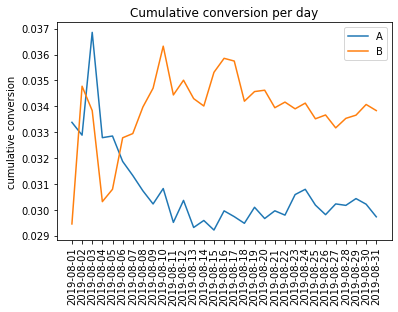

In [30]:
#build graphics cumulative conversion per day 
pl.title("Cumulative conversion per day")
pl.ylabel("cumulative conversion")
plt.xticks(rotation=90)
plt.plot(cumulative_conversion['date'], cumulative_conversion['conversionA'], label='A')
plt.plot(cumulative_conversion['date'], cumulative_conversion['conversionB'], label='B')
plt.legend()

На графике кумулятивной конверсии по группам мы видим, что данные колебались в начале теста, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

Построим график относительного различия кумулятивных конверсий:

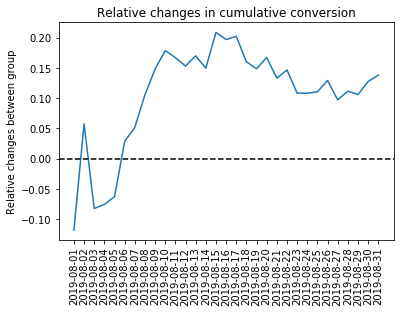

In [31]:
pl.title("Relative changes in cumulative conversion")
pl.ylabel("Relative changes between group")
plt.xticks(rotation=90)
plt.plot(cumulative_conversion['date'], cumulative_conversion['conversionB']/cumulative_conversion['conversionA']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

На графике отноносительного различия кумулятивых конверсий мы видим, что в начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и показывает результат стабильно выше группы А. Однако построим графики распределения количества заказов по пользователям и посмотрим наличие аномальных данных в них:

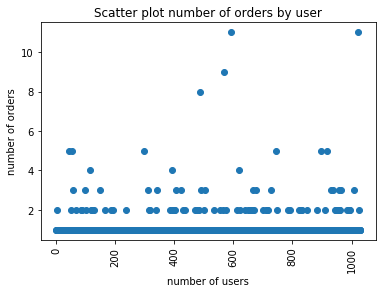

In [32]:
pl.title("Scatter plot number of orders by user")
pl.ylabel("number of orders")
pl.xlabel("number of users")
plt.xticks(rotation=90)
orders_by_visitors = orders_data.groupby('visitorId')['transactionId'].count()
orders_by_visitors
x_value = range(0, len(orders_by_visitors))
plt.scatter(x_value, orders_by_visitors)

На графике видно, что основное количество пользователей совершили на сайте 1-2 заказа, но присутствуют пользователи и с большим количеством заказов.Эти данные могут исказить статистику группы теста, так как они являются редкими и проявляются не из-за тестируемой гипотезы, нам следует удалить такие заказы из выборок

Определим аномальные значения количества заказов, которые расположены в пределах 1-5% всей выборки. Для этого рассчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [33]:
print(np.percentile(orders_by_visitors, [ 95, 99]))

[2. 4.]


Данные свидетельствуют о том, что не более 5% совершают более 2 заказов и не более 1%  более 4

In [34]:
orders_by_visitors.describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: transactionId, dtype: float64

С помощью метода describe мы так же отметили, что 75% совершают 1 заказ

Построим точечный график по распределению выручки:

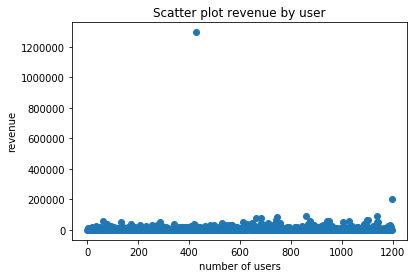

In [35]:
pl.title("Scatter plot revenue by user")
pl.ylabel("revenue")
pl.xlabel("number of users")
x_value = range(0, len(orders_data['revenue']))
plt.scatter(x_value, orders_data['revenue'])

На графике видно, что основная доля выручки лежит в пределах 100000, однако мы видим несколько заказов которые сильно выбиваются из общей картины, скорее всего именно они и послужили причиной выбросов на графике по кумулятивной выручке. Для более точного определения пороговых значений рассчитаем 95 и 99 перцентили по выручке

In [36]:
print(np.percentile(orders_data['revenue'], [ 95, 99]))

[28000.  58233.2]


Исходя из полученных данных мы видим, что не более 5% совершили заказ более чем на 28000 и не более 1% более чем на 58233. Это подтверждает наши предположения о наличие аномальных данных, далее мы отфильтруем их и сравним очищенные данные.

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [37]:
#count orders by visitors in group A
orders_by_visitorsA = orders_data[orders_data.group=='A'].groupby('visitorId')['transactionId'].nunique()
len(orders_by_visitorsA)

503

In [38]:
#count orders by visitors in group B
orders_by_visitorsB = orders_data[orders_data.group=='B'].groupby('visitorId')['transactionId'].nunique()
len(orders_by_visitorsB)

586

In [39]:
#count sum of visitors in group A
visitorsA = visitors_data[visitors_data.group == 'A']['visitors'].sum()
visitorsA

18736

In [40]:
#count sum of visitors in group B
visitorsB = visitors_data[visitors_data.group == 'B']['visitors'].sum()
visitorsB

18916

In [41]:
#count number of visits without order ib group A
visitors_null_ordersA = visitorsA - len(orders_by_visitorsA)
visitors_null_ordersA

18233

In [42]:
#count number of visits without order ib group B
visitors_null_ordersB = visitorsB - len(orders_by_visitorsB)
visitors_null_ordersB

18330

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [44]:
sampleA = pd.concat([orders_by_visitorsA,pd.Series(0, index=np.arange(visitors_null_ordersA), name='transactionId')],axis=0)
sampleB = pd.concat([orders_by_visitorsB,pd.Series(0, index=np.arange(visitors_null_ordersB), name='transactionId')],axis=0)

Чтобы рассчитать статистическую значимость различий в конверсии между сегментами, передадим критерию mannwhitneyu() данные о конверсии по группам. Также выведем относительный прирост конверсии группы B

In [45]:

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы можем отвергнуть. Относительный выигрыш группы B равен 13.8% 

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.
Также найдём относительные различия в среднем чеке между группами:

In [46]:
print("{0:.3f}".format(stats.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], orders_data[orders_data['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders_data[orders_data['group']=='B']['revenue'].mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B значительно выше среднего чека группы A.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Узнаем, сколько всего аномальных пользователей методом shape()

In [47]:
anomality_orders = pd.concat([orders_by_visitorsA[orders_by_visitorsA > 2].reset_index()['visitorId'], orders_by_visitorsB[orders_by_visitorsB > 2].reset_index()['visitorId']], axis = 0)
anomality_revenue = orders_data[orders_data['revenue'] > 30000]['visitorId']
abnormal_users = pd.concat([anomality_orders, anomality_revenue], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print(abnormal_users.shape)


1099    148427295
0       199603092
928     204675465
1       237748145
0       249864742
Name: visitorId, dtype: int64
(68,)


Всего 68 аномальных пользователей.

#### Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 
Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [48]:
#concat orders with excluding anomalies and visitors without orders by group A
orders_by_visitorsA = orders_by_visitorsA.reset_index()
sampleAFiltered = pd.concat([
    orders_by_visitorsA[np.logical_not(orders_by_visitorsA['visitorId'].isin(abnormal_users))]['transactionId'],
    pd.Series(0, index=np.arange(visitors_null_ordersA), name='orders')],axis=0)



In [49]:
#concat orders with excluding anomalies and visitors without orders by group B
orders_by_visitorsB = orders_by_visitorsB.reset_index()
sampleBFiltered = pd.concat([
    orders_by_visitorsB[np.logical_not(orders_by_visitorsB['visitorId'].isin(abnormal_users))]['transactionId'],
    pd.Series(0, index=np.arange(visitors_null_ordersB), name='orders')],axis=0)


Применим статистический критерий Манна-Уитни к полученным выборкам:

In [50]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.172


Результаты по конверсии практически не изменились. Относительная разница конверсии по группе B немного увеличилась

#### Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [51]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'],
    orders_data[np.logical_and(
        orders_data['group']=='B',
        np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders_data[np.logical_and(orders_data['group']=='B',np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'].mean()/
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))


0.360
-0.023


P-value немного снизился. Также мы видим, что с фильтрацией аномалий средний чек по группе B стал меньше на 20% чем по группе А 

### Выводы

Имеющиеся факты:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Вывод: группа B статистически значимо лучше группы A по конверсии, а график конверсии говорит о фиксации результата.Однако по среднему чеку по данным теста статистической значимости между группами нет. Следовательно мы можем остановить тест, признать его успешным так как между группами нет различий в среднем чеке, но у группы B конверсия выше, чем у группы А